In [325]:
import numpy as np
import cv2
import math
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline

In [326]:
near=cv2.imread('q4_01_near.jpg')
far1=cv2.imread('q4_02_far.jpg')
shape=far1.shape


far=np.zeros((shape[0],shape[1],3)).astype(int)

d=0.1991
a=1.15

#70 , -70
#0.1911
translate=np.array([[a*math.cos(d),-a*math.sin(d),53],
          [a*math.sin(d),a*math.cos(d),-115],
          [0,0,1]])


for x in range(0,shape[0]):
    for y in range(0,shape[1]):
        v=[[x],
          [y],
          [1]]
        v2=translate.dot(v).astype(int)
        for i in range(0,3):
            if((v2[0][0]<shape[0]) & (v2[1][0]<shape[1])):
                far[v2[0][0]][v2[1][0]][i]=int(far1[x][y][i])
                
                
                
                
    
    
cv2.imwrite('q4_03_near.jpg',near) 
cv2.imwrite('q4_04_far.jpg',far)

True

In [327]:
#in frequency domain
def amplitude_image(image):
    r=[]
    for i in range(0,3):
        fft = np.fft.fft2(image[:,:,i])
        shifted= np.fft.fftshift(fft)
        amplitude_image = np.abs(shifted)
        r.append(np.log(amplitude_image))
        
    return cv2.merge([r[0],r[1],r[2]])

In [328]:
A_near=amplitude_image(near)
A_far=amplitude_image(far)

In [329]:
scipy.misc.imsave('q4_05_dft_near.jpg',A_near)
scipy.misc.imsave('q4_06_dft_far.jpg',A_far)

/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  


In [330]:
def highPassFilter(cut,sigma,rows,cols):
    if rows%2==1:
        x_center=int(rows/2)+1
    else:
        x_center=rows/2
    if cols%2==1:
        y_center=int(cols/2)+1
    else:
        y_center=(cols/2)
    Filter=np.array(np.zeros((rows,cols)))   
    for j in range(0,cols):
        for i in range(0,rows):
            if cut==0:
                Filter[i][j]=1-math.exp(-1.0 * ((i-x_center)**2 + (j-y_center)**2) / (2 * sigma**2))
            elif ((i-x_center)**2 + (j-y_center)**2)>=cut:
                Filter[i][j]=1-math.exp(-1.0 * ((i-x_center)**2 + (j-y_center)**2) / (2 * sigma**2))
            else:
                Filter[i][j]=0
            
    return Filter 

In [331]:
def lowPassFilter(cut,sigma,rows,cols):
    if rows%2==1:
        x_center=int(rows/2)+1
    else:
        x_center=rows/2
    if cols%2==1:
        y_center=int(cols/2)+1
    else:
        y_center=(cols/2)
        
    Filter=np.array(np.zeros((rows,cols)))  
    
    for j in range(0,cols):
        for i in range(0,rows): 
            if cut==0:
                Filter[i][j]=math.exp(-1.0 * ((i-x_center)**2 + (j-y_center)**2) / (2 * sigma**2))
            elif ((i-x_center)**2 + (j-y_center)**2)<=cut:
                Filter[i][j]=math.exp(-1.0 * ((i-x_center)**2 + (j-y_center)**2) / (2 * sigma**2))

            else:
                Filter[i][j]=0
                
          
    return Filter   

/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if sys.path[0] == '':


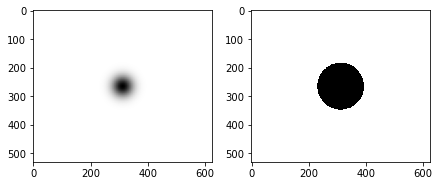

In [332]:
cut1=(shape[0]/10)**2+(shape[1]/10)**2
s1=25
g1=highPassFilter(0,s1,shape[0],shape[1])
filter1=highPassFilter(cut1,s1,shape[0],shape[1])

fig, ax = plt.subplots(1,2,constrained_layout=True)

ax[0].imshow(g1,cmap='gray')
ax[1].imshow(filter1,cmap='gray')

scipy.misc.imsave('Q4_07_highpass_'+str(s1)+'.jpg',g1)
scipy.misc.imsave('Q4_09_highpass_'+str(cut1)+'.jpg',filter1)

/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()
/Users/helia_yaz/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if sys.path[0] == '':


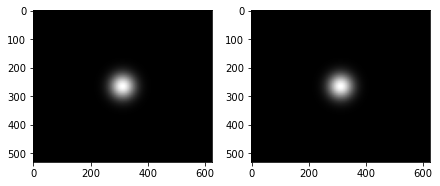

In [333]:
cut2=(shape[0]/4)**2+(shape[1]/4)**2

s2=30
g2=lowPassFilter(0,s2,shape[0],shape[1])
filter2=lowPassFilter(cut2,s2,shape[0],shape[1])

fig , axs=plt.subplots(1,2,constrained_layout=True)
axs[0].imshow(g2,cmap='gray')
axs[1].imshow(filter2,cmap='gray')

scipy.misc.imsave('Q4_08_lowpass_'+str(s2)+'.jpg',g2)
scipy.misc.imsave('Q4_10_lowpass_'+str(cut2)+'.jpg',filter2)

In [334]:
def applyingFilter(image,filterG,i):
    fft = np.fft.fft2(image[:,:,i])
    shifted= np.fft.fftshift(fft)
    fil_fft=shifted *filterG
    return fil_fft

def invFFT(filtered):
    im_ishifted = np.fft.ifftshift(filtered)
    im = np.fft.ifft2(im_ishifted)
    im = np.real(im)
        
    return im

In [335]:
fil_near_b=applyingFilter(near,filter1,0)
fil_near_g=applyingFilter(near,filter1,1)
fil_near_r=applyingFilter(near,filter1,2)

filtered_near=cv2.merge([np.real(fil_near_b),np.real(fil_near_g),np.real(fil_near_r)])

fil_far_b=applyingFilter(far,filter2,0)
fil_far_g=applyingFilter(far,filter2,1)
fil_far_r=applyingFilter(far,filter2,2)

filtered_far=cv2.merge([np.real(fil_far_b),np.real(fil_far_g),np.real(fil_far_r)])

cv2.imwrite('Q4_11_highpassed.jpg',filtered_near)
cv2.imwrite('Q4_12_lowpassed.jpg',filtered_far)

True

In [336]:
frequency_b=0.7*fil_near_b+0.3*fil_far_b
frequency_g=0.7*fil_near_g+0.3*fil_far_g
frequency_r=0.7*fil_near_r+0.3*fil_far_r


frequency_result=cv2.merge([np.real(frequency_b),np.real(frequency_g),np.real(frequency_r)])
cv2.imwrite('Q4_13_hybrid_frequency.jpg',frequency_result)

True

In [337]:
hybrid_b= invFFT(frequency_b)
hybrid_g= invFFT(frequency_g)
hybrid_r= invFFT(frequency_r)

hybrid_near=cv2.merge([hybrid_b,hybrid_g,hybrid_r])
cv2.imwrite('Q4_14_hybrid_near.jpg',hybrid_near)

True

In [338]:
width = int(shape[1] * 40 / 100)
height = int(shape[0] * 40 / 100)
hybrid_far = cv2.resize(hybrid_near, (width,height), interpolation = cv2.INTER_AREA)
cv2.imwrite('Q4_15_hybrid_far.jpg',hybrid_far)

True